In [17]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [1]:
import joblib
df_eval = joblib.load('df_eval.pkl')

In [44]:
cell_ids = ['05','06','07','18','49','51','53','54','55','56']
df_list = []
for i, cell_id in enumerate(cell_ids):
    df_list.append(df_eval[df_eval.cell == 'B00' + cell_id])
    df_list[i].reset_index(inplace=True)
    df_list[i].drop('index', axis=1, inplace=True)

/home/hkqai/miniconda3/lib/python3.9/site-packages/pandas/core/frame.py:4901: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [45]:
df_list[2]

,time_for_max_temp_D,max_temp_D,slope_temp_D,time_voltage_measured_below3_D,slope_voltage_measured_D,capacity,cell,ambient_temp_4,ambient_temp_24,predictions
0,3489.219,40.260234,0.004584,3388.735,-0.000338,1.880637,B0007,0,1,NaN
1,3489.094,40.275586,0.004571,3368.937,-0.000339,1.880663,B0007,0,1,1.880674
2,3489.297,40.293147,0.004604,3369.157,-0.000342,1.880771,B0007,0,1,NaN
3,3487.172,40.268873,0.004626,3367.156,-0.000344,1.879451,B0007,0,1,1.878580
4,3469.188,39.676208,0.004476,3368.906,-0.000344,1.880700,B0007,0,1,NaN
...,...,...,...,...,...,...,...,...,...,...
161,2617.109,40.741759,0.006586,2472.172,-0.000444,1.406171,B0007,0,1,NaN
162,2617.297,41.009644,0.006669,2462.750,-0.000444,1.406336,B0007,0,1,NaN
163,2606.547,40.805587,0.006603,2461.547,-0.000444,1.400455,B0007,0,1,NaN
164,2645.328,40.925860,0.006213,2490.625,-0.000433,1.421787,B0007,0,1,NaN


In [54]:
#rmse
from sklearn.metrics import mean_squared_error

def get_rmse(cell_id):
    i = cell_ids.index(cell_id)
    mse = mean_squared_error(df_list[i].dropna().capacity, df_list[i].dropna().predictions)
    rmse = np.sqrt(mse)
    return rmse

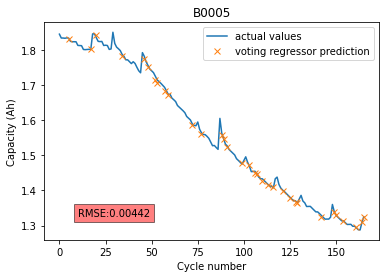

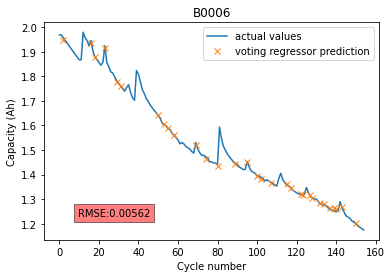

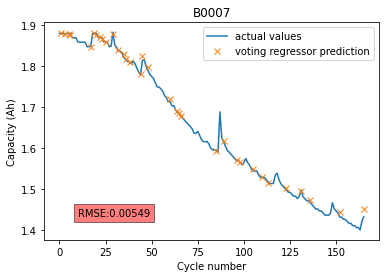

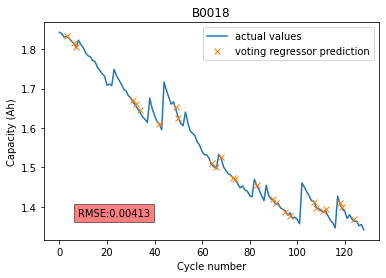

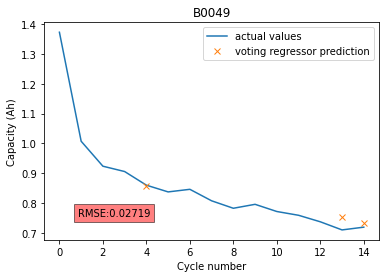

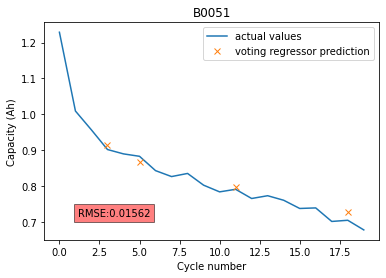

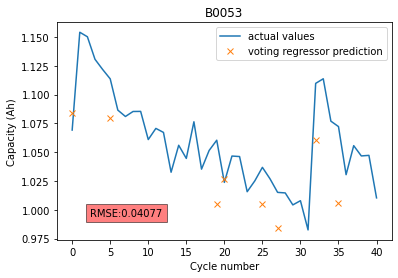

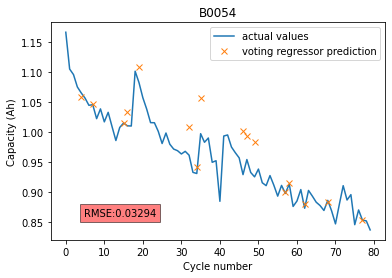

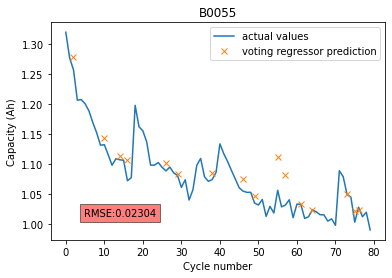

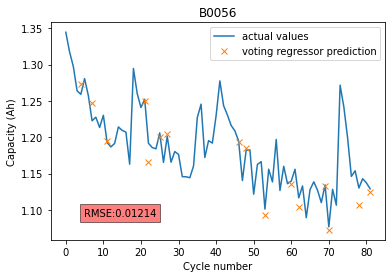

In [68]:
for i, cell_id in enumerate(cell_ids):
    x = df_list[i].index
    rmse = get_rmse(cell_id).round(5)
    plt.plot(x, df_list[i].capacity, label='actual values')
    plt.plot(x, df_list[i].predictions,linestyle = '', marker = 'x', label= 'voting regressor prediction')
    plt.xlabel('Cycle number')
    plt.ylabel('Capacity (Ah)')
    plt.title('B00'+cell_id)
    ymin, ymax = plt.gca().get_ylim()
    xmin, xmax = plt.gca().get_xlim()
    plt.text(xmin+(xmax-xmin)/10, ymin+(ymax-ymin)/10, 'RMSE:' + str(rmse), horizontalalignment='left', verticalalignment='bottom', bbox=dict(facecolor='red', alpha=0.5))
    plt.legend()
    plt.show()